# Exercise- Mortality Notebook

In [102]:
import pandas as pd

In [103]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [104]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')

## Work with the long DataFrame

In [105]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [106]:
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate', 'MeanCentered'], dtype='object')

In [107]:
mortality_data.columns = mortality_data.columns.str.replace('DeathRate','Deaths/100K')
mortality_data.head()

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [108]:
mortality_data['Year'].head() 

0    1900
1    1901
2    1902
3    1903
4    1904
Name: Year, dtype: int64

In [109]:
mortality_data[['Year','MeanCentered']].head()

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [110]:
mortality_data.query('Year >= 1915 and Year <= 1920').tail(6)

,Year,AgeGroup,Deaths/100K,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


In [111]:
mortality_data.query('AgeGroup == "01-04 Years"')[['Year','Deaths/100K']].head()

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5


In [112]:
with pd.option_context(
    'display.max_rows', 6,
    'display.max_columns', None):
    display(mortality_data.sort_values('Deaths/100K', ascending=False))

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
...,...,...,...,...
233,2014,05-09 Years,11.5,-181.42416
229,2010,05-09 Years,11.5,-181.42416
231,2012,05-09 Years,11.4,-181.52416


In [113]:
mortality_data['Deaths/100K'].median()

89.5

In [114]:
mortality_data.groupby('Year')['Deaths/100K'].sum()

Year
1900    3233.0
1901    2850.6
1902    2733.0
1903    2659.1
1904    2793.1
         ...  
2014      95.0
2015      99.5
2016     103.3
2017     102.9
2018      99.6
Name: Deaths/100K, Length: 119, dtype: float64

In [115]:
mortality_data.groupby('Year')[['Deaths/100K','MeanCentered']].sum()

,Deaths/100K,MeanCentered
Year,,
1900,3233.0,2461.303361
1901,2850.6,2078.903361
1902,2733.0,1961.303361
1903,2659.1,1887.403361
1904,2793.1,2021.403361
...,...,...
2014,95.0,-676.696639
2015,99.5,-672.196639
2016,103.3,-668.396639


## Work with the wide DataFrame

In [116]:
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,1983.8,466.1,298.3,484.8
1,1901,1695.0,427.6,273.6,454.4
2,1902,1655.7,403.3,252.5,421.5
3,1903,1542.1,414.7,268.2,434.1
4,1904,1591.5,425.0,305.2,471.4


In [117]:
mortality_wide.index

RangeIndex(start=0, stop=119, step=1)

In [118]:
mortality_wide.tail(5)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
114,2014,24.0,11.5,14.0,45.5
115,2015,24.9,11.7,14.6,48.3
116,2016,25.3,12.2,14.6,51.2
117,2017,24.3,11.6,15.5,51.5
118,2018,24.0,11.5,14.9,49.2


In [119]:
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
01-04 Years,119.0,383.226050,500.454211,24.0,50.65,109.1,577.30,1983.8
05-09 Years,119.0,117.326050,127.474958,11.4,24.00,48.4,198.90,466.1
10-14 Years,119.0,93.769748,88.404363,13.9,27.20,44.6,158.90,375.1
15-19 Years,119.0,177.374790,138.362290,44.8,85.45,106.9,283.65,777.4


In [120]:
mortality_wide.describe()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
count,119.000000,119.000000,119.000000,119.000000,119.00000
mean,1959.000000,383.226050,117.326050,93.769748,177.37479
std,34.496377,500.454211,127.474958,88.404363,138.36229
min,1900.000000,24.000000,11.400000,13.900000,44.80000
25%,1929.500000,50.650000,24.000000,27.200000,85.45000
50%,1959.000000,109.100000,48.400000,44.600000,106.90000
75%,1988.500000,577.300000,198.900000,158.900000,283.65000
max,2018.000000,1983.800000,466.100000,375.100000,777.40000


In [121]:
mortality_wide[['Year', '01-04 Years']]

,Year,01-04 Years
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [122]:
mortality_wide.query('Year >= 1915 and Year <= 1920').head(6)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,924.2,260.6,196.7,330.9
16,1916,1111.5,282.4,205.1,355.8
17,1917,1066.0,290.7,218.9,380.3
18,1918,1573.5,447.9,375.1,777.4
19,1919,928.0,300.0,236.4,438.5
20,1920,987.2,295.2,229.9,402.9


In [123]:
mortality_wide.query('Year >= 1915 and Year <= 1920')[['Year','01-04 Years']].head(6)

,Year,01-04 Years
15,1915,924.2
16,1916,1111.5
17,1917,1066.0
18,1918,1573.5
19,1919,928.0
20,1920,987.2


In [124]:
mortality_data.groupby('AgeGroup').agg(['mean','median','sum'])

Year                 Deaths/100K                 MeanCentered  \
               mean  median     sum        mean median      sum         mean   
AgeGroup                                                                       
01-04 Years  1959.0  1959.0  233121  383.226050  109.1  45603.9   190.301891   
05-09 Years  1959.0  1959.0  233121  117.326050   48.4  13961.8   -75.598109   
10-14 Years  1959.0  1959.0  233121   93.769748   44.6  11158.6   -99.154412   
15-19 Years  1959.0  1959.0  233121  177.374790  106.9  21107.6   -15.549370   

                                   
                median        sum  
AgeGroup                           
01-04 Years  -83.82416  22645.925  
05-09 Years -144.52416  -8996.175  
10-14 Years -148.32416 -11799.375  
15-19 Years  -86.02416  -1850.375

In [125]:
mortality_wide['TotalDeaths'] = mortality_wide['01-04 Years'] + mortality_wide['05-09 Years'] + mortality_wide['10-14 Years'] + mortality_wide['15-19 Years']
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
0,1900,1983.8,466.1,298.3,484.8,3233.0
1,1901,1695.0,427.6,273.6,454.4,2850.6
2,1902,1655.7,403.3,252.5,421.5,2733.0
3,1903,1542.1,414.7,268.2,434.1,2659.1
4,1904,1591.5,425.0,305.2,471.4,2793.1
...,...,...,...,...,...,...
114,2014,24.0,11.5,14.0,45.5,95.0
115,2015,24.9,11.7,14.6,48.3,99.5
116,2016,25.3,12.2,14.6,51.2,103.3
117,2017,24.3,11.6,15.5,51.5,102.9


<Axes: xlabel='Year'>

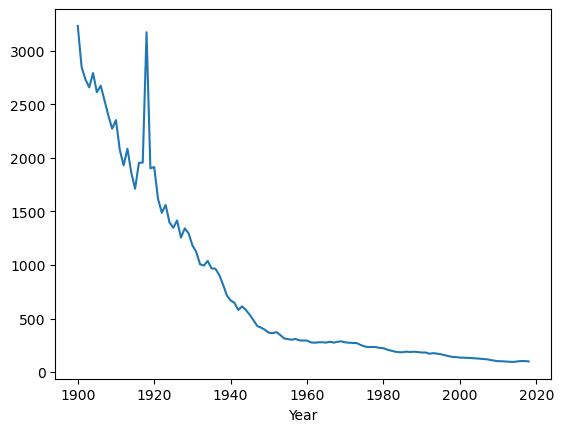

In [126]:
mortality_wide.groupby('Year').TotalDeaths.sum().plot()

<Axes: xlabel='Year', ylabel='Deaths/100K'>

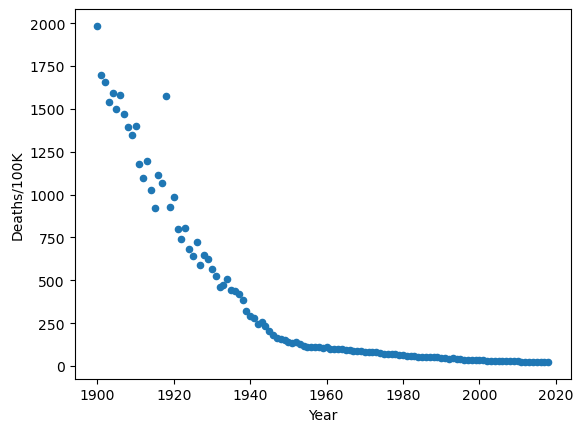

In [127]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='Deaths/100K')

In [128]:
mortality_data[['AgeGroup','Deaths/100K']].max()

AgeGroup       15-19 Years
Deaths/100K         1983.8
dtype: object

In [129]:
mortality_data[['AgeGroup','Deaths/100K']].min()

AgeGroup       01-04 Years
Deaths/100K           11.4
dtype: object

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

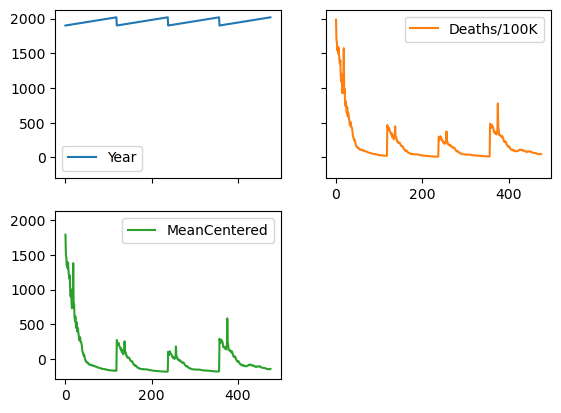

In [130]:
mortality_data.plot.line(sharey=True, subplots=True, layout=(2,2))

<Axes: title={'center': 'Child Mortality: 15-19 Years'}>

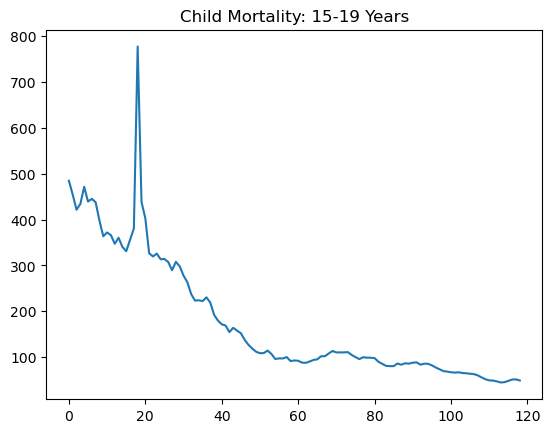

In [131]:
mortality_wide.plot.line(y='15-19 Years', title='Child Mortality: 15-19 Years', legend=False)

<Axes: title={'center': 'Child Mortality: 1900'}, xlabel='AgeGroup'>

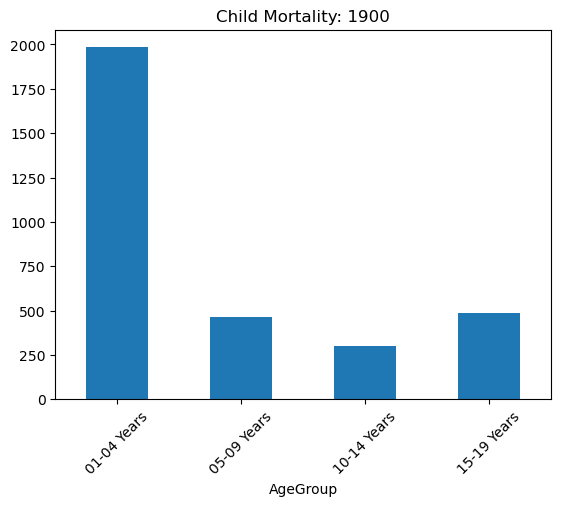

In [132]:
mortality_data.query('Year == 1900') \
    .pivot(index='AgeGroup', columns='Year', values='Deaths/100K') \
    .plot.bar(title='Child Mortality: 1900', legend=False, rot=45)

<Axes: title={'center': 'Child Mortality: 1950'}, xlabel='AgeGroup'>

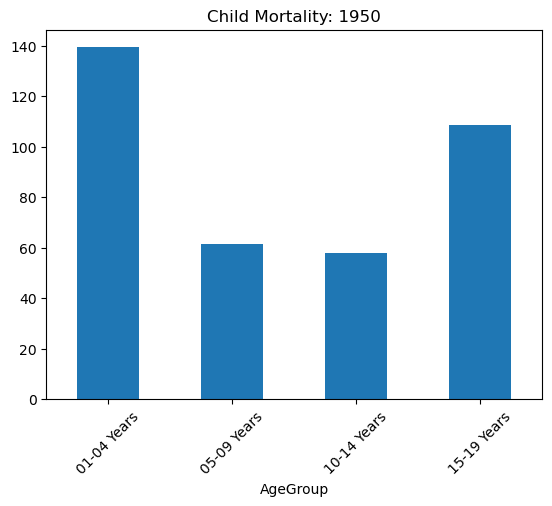

In [133]:
mortality_data.query('Year == 1950') \
    .pivot(index='AgeGroup', columns='Year', values='Deaths/100K') \
    .plot.bar(title='Child Mortality: 1950', legend=False, rot=45)

<Axes: title={'center': 'Child Mortality: 2000'}, xlabel='AgeGroup'>

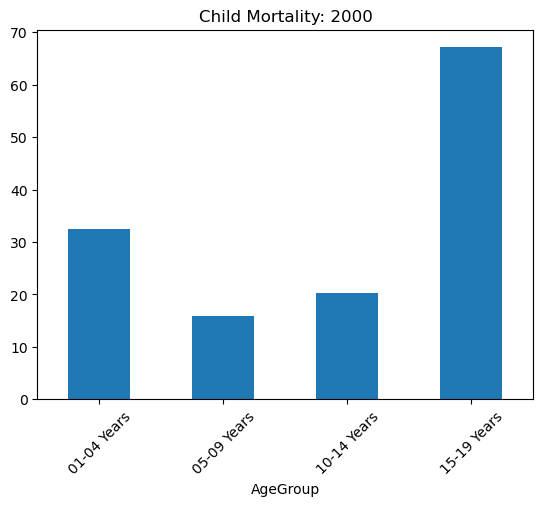

In [134]:
mortality_data.query('Year == 2000') \
    .pivot(index='AgeGroup', columns='Year', values='Deaths/100K') \
    .plot.bar(title='Child Mortality: 2000', legend=False, rot=45)

<Axes: ylabel='Frequency'>

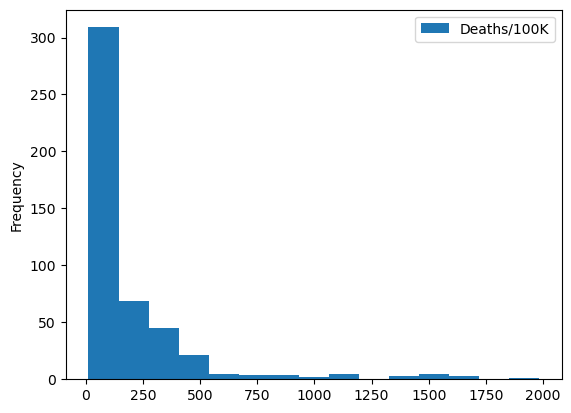

In [135]:
mortality_data.plot.hist(y='Deaths/100K', bins=15)

<Axes: title={'center': 'Child Mortality Density: 1900'}, ylabel='Density'>

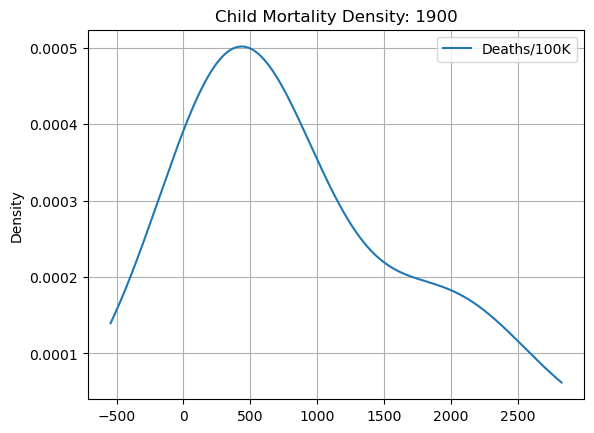

In [136]:
mortality_data.query('Year==1900') \
    .plot.density(y='Deaths/100K', grid=True, title='Child Mortality Density: 1900')

<Axes: title={'center': 'Child Mortality Density: 2000'}, ylabel='Density'>

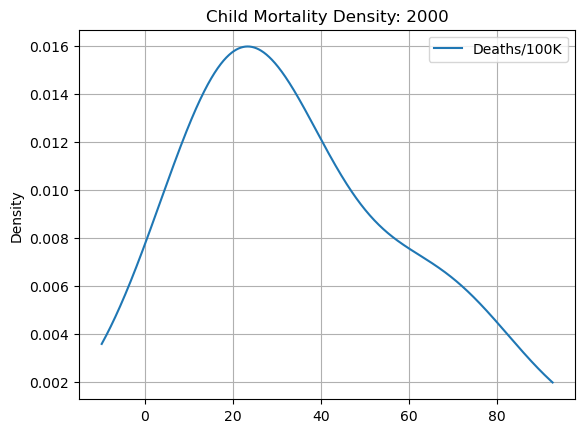

In [137]:
mortality_data.query('Year==2000') \
    .plot.density(y='Deaths/100K', grid=True, title='Child Mortality Density: 2000')